## Libraries

This post relies on the [PyWaffle library](https://github.com/gyli/PyWaffle), that is definitely the best way to create a waffle chart with Python.

The very first thing to do is to install the library:

`pip install pywaffle`

Then, we just have to import the following libraries:
- `pandas` for creating a dataframe with our data
- `matplotlib` for customizing the chart
- `pywaffle` for the **waffle** type figure

In [1]:
import matplotlib.pyplot as plt
from pywaffle import Waffle
import pandas as pd

## Dataset

We create a simple dataset with the **number of cars**, broken down **by factory and car type** (`car`, `truck` or `motorcycle`). Also, we define the index of this dataset using the `set_index()` function and specify that it is the `label` variable.

In [2]:
data = {'labels': ['Car', 'Truck', 'Motorcycle'],
        'Factory A': [32384, 13354, 5245],
        'Factory B': [22147, 6678, 2156],
        'Factory C': [8932, 3879, 896],
       }
df = pd.DataFrame(data).set_index('labels')

## Simple waffle chart

First, let's create a **simple waffle chart** to see what it looks like. We have to define the properties of our chart and then pass it to the `figure()` function from [matplotlib](https://python-graph-gallery.com/matplotlib/).

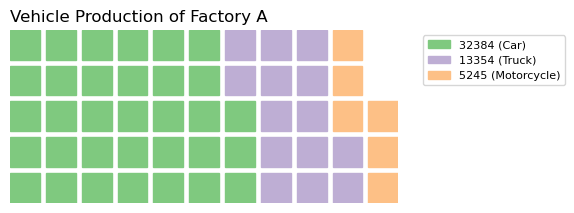

In [3]:
plot = {'values': [value/1000 for value in data['Factory A']],  # Convert actual number to a reasonable block number
        'labels': [f"{index} ({value})" for index, value in zip(df['Factory A'],df.index)],
        'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
        'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 12}
        }

fig = plt.figure(
    FigureClass=Waffle,
    plots={311: plot},
    rows=5, # Outside parameter
    cmap_name="Accent", # Change color with cmap
    rounding_rule='ceil', # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6)
)

# Display the chart
plt.show()

## Waffle chart with grouping

This example can be found in the [original documentation of PyWaffle](https://github.com/gyli/PyWaffle) (this one here is slighly different). 

The very first thing to do is to create our `plot dictionnaries`. In our case, since we want 3 different charts, we create 3 plot dictionnaries with the **values and properties** we want them to have. We divide the values by 1000 only because we want to **reduce the size** of them but it's optionnal. 

Then, we just have to add these dictionnaries into the `plot` argument of the `figure()` function from matplotlib. 

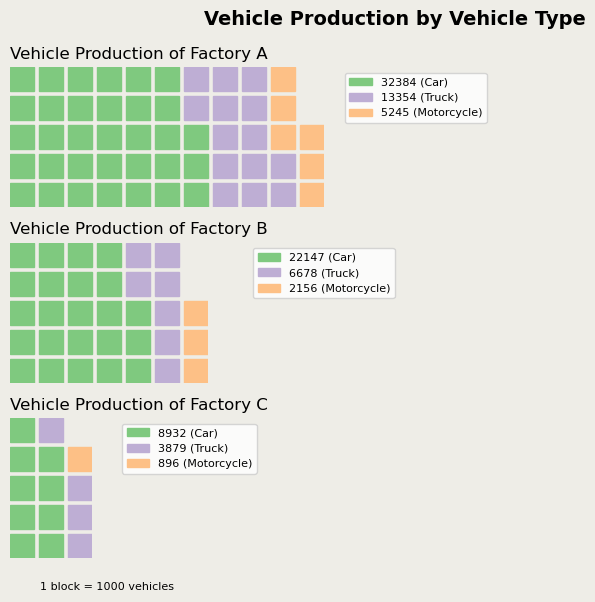

In [4]:
plot1 = {'values': [value/1000 for value in data['Factory A']],  # Convert actual number to a reasonable block number
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory A'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
         'title': {'label': 'Vehicle Production of Factory A', 'loc': 'left', 'fontsize': 12}
        }

plot2 = {'values': [value/1000 for value in data['Factory B']],
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory B'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
         'title': {'label': 'Vehicle Production of Factory B', 'loc': 'left', 'fontsize': 12}
        }

plot3 = {'values': [value/1000 for value in data['Factory C']],
         'labels': [f"{index} ({value})" for index, value in zip(df['Factory C'],df.index)],
         'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
         'title': {'label': 'Vehicle Production of Factory C', 'loc': 'left', 'fontsize': 12}
        }

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: plot1,
        312: plot2,
        313: plot3,
    },
    rows=5,  # Outside parameter applied to all subplots, same as below
    cmap_name="Accent",  # Change color with cmap
    rounding_rule='ceil',  # Change rounding rule, so value less than 1000 will still have at least 1 block
    figsize=(8, 6)
)

# Add a title and a small detail at the bottom
fig.suptitle('Vehicle Production by Vehicle Type', fontsize=14, fontweight='bold')
fig.supxlabel('1 block = 1000 vehicles',
              fontsize=8,
              x=0.14, # position at the 14% axis
             )
fig.set_facecolor('#EEEDE7')

plt.show()

## Going further

This post explains how to create a [waffle chart](https://python-graph-gallery.com/waffle-chart/) with grouping.

For more examples of **how to create or customize** your waffle chart, see the [waffle section](https://python-graph-gallery.com/waffle-chart/). You may also be interested in how to [change the icons](https://python-graph-gallery.com/503-waffle-chart-introduction/).